# Menu-graph & planning-uncertainty analyses
This notebook mirrors the `menu_graph_analysis.py` script. Run the cell below to execute the pipeline on the HDDM2 CSV files in the current directory.

🔍 Testing notebook output...
✅ Found: hddm2_fixed_final_2states.csv
✅ Found: hddm2_fixed_final_3states.csv
✅ Found: hddm2_fixed_final_4states.csv
✅ Found: hddm2_fixed_final_5states.csv

📊 Sample from hddm2_fixed_final_2states.csv:
   Shape: (29530, 15)
   Columns: ['Unnamed: 0', 'subj_idx', 'rt1', 'rt2', 'response1']...
   First few rows:
   Unnamed: 0  subj_idx    rt1    rt2  response1  response2  state1  state2  \
0           1       0.0  1.139  1.345        1.0        1.0     0.0     1.0   
1           2       0.0  0.781  1.268        0.0        1.0     0.0     0.0   
2           3       0.0  0.439  1.879        0.0        1.0     0.0     1.0   

   feedback  trial  cond  q_init  isleft1  isleft2  split_by  
0       0.0    0.0   1.0     0.5      1.0      0.0       1.0  
1       1.0    1.0   1.0     0.5      1.0      1.0       1.0  
2       0.0    2.0   1.0     0.5      1.0      1.0       1.0  

📈 Creating test plot...


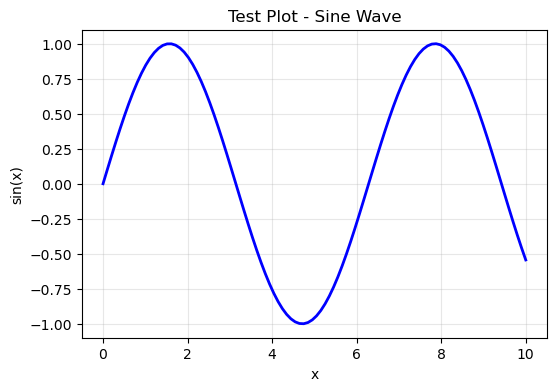

✅ Test completed successfully!


In [19]:
# Simple test to see if output displays
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Enable inline plotting
%matplotlib inline

print("🔍 Testing notebook output...")
print("=" * 40)

# Test basic data loading
try:
    # Check if files exist
    files = [
        'hddm2_fixed_final_2states.csv',
        'hddm2_fixed_final_3states.csv', 
        'hddm2_fixed_final_4states.csv',
        'hddm2_fixed_final_5states.csv'
    ]
    
    for f in files:
        if pd.io.common.file_exists(f):
            print(f"✅ Found: {f}")
        else:
            print(f"❌ Missing: {f}")
    
    # Test loading one file
    for f in files:
        if pd.io.common.file_exists(f):
            df = pd.read_csv(f)
            print(f"\n📊 Sample from {f}:")
            print(f"   Shape: {df.shape}")  
            print(f"   Columns: {list(df.columns[:5])}...")
            print(f"   First few rows:")
            print(df.head(3))
            break
    
    # Test simple plot
    print("\n📈 Creating test plot...")
    fig, ax = plt.subplots(figsize=(6, 4))
    x = np.linspace(0, 10, 100)
    y = np.sin(x)
    ax.plot(x, y, 'b-', linewidth=2)
    ax.set_title('Test Plot - Sine Wave')
    ax.set_xlabel('x')
    ax.set_ylabel('sin(x)')
    ax.grid(True, alpha=0.3)
    plt.show()
    
    print("✅ Test completed successfully!")
    
except Exception as e:
    print(f"❌ Error during test: {e}")
    import traceback
    traceback.print_exc()


📊 ANALYSIS 1: Stage-1 RT by Johnson Distance
Regression Results:
                            OLS Regression Results                            
Dep. Variable:                log_rt1   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     181.8
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           9.47e-52
Time:                        19:17:16   Log-Likelihood:                -52849.
No. Observations:              122378   AIC:                         1.057e+05
Df Residuals:                  122372   BIC:                         1.058e+05
Df Model:                           5                                         
Covariance Type:              cluster                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

/var/folders/s0/k9fg8kp94xl307gydfsd9gf00000gq/T/ipykernel_11924/1328841380.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax.boxplot(data, labels=['d=0','d=1','d=2'], patch_artist=True)


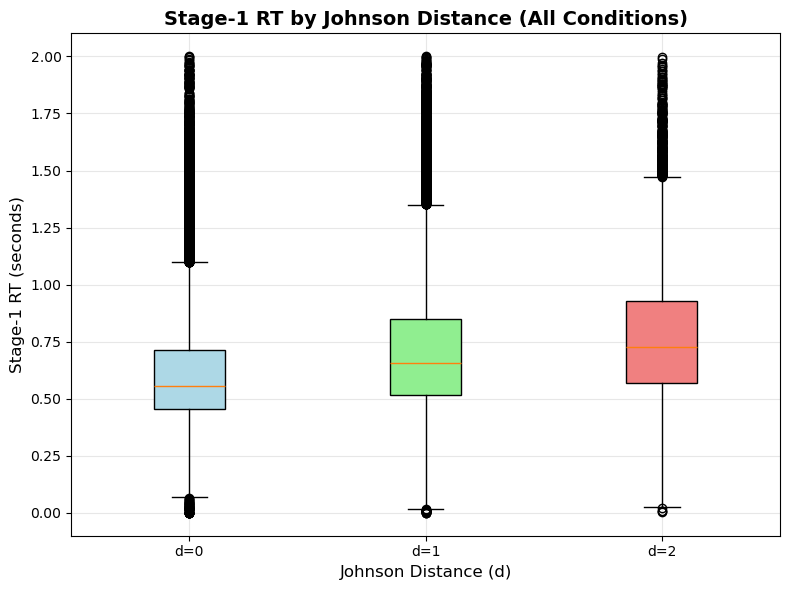

💾 Saved regression summary to rt1_vs_johnson_distance_summary.txt

📊 ANALYSIS 2: Stage-1 RT with Recency Effects


/var/folders/s0/k9fg8kp94xl307gydfsd9gf00000gq/T/ipykernel_11924/1328841380.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = sub.groupby('lag_bin').agg(


Regression Results with Recency:
                            OLS Regression Results                            
Dep. Variable:                log_rt1   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     135.8
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           2.15e-51
Time:                        19:17:16   Log-Likelihood:                -51936.
No. Observations:              120690   AIC:                         1.039e+05
Df Residuals:                  120682   BIC:                         1.040e+05
Df Model:                           7                                         
Covariance Type:              cluster                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

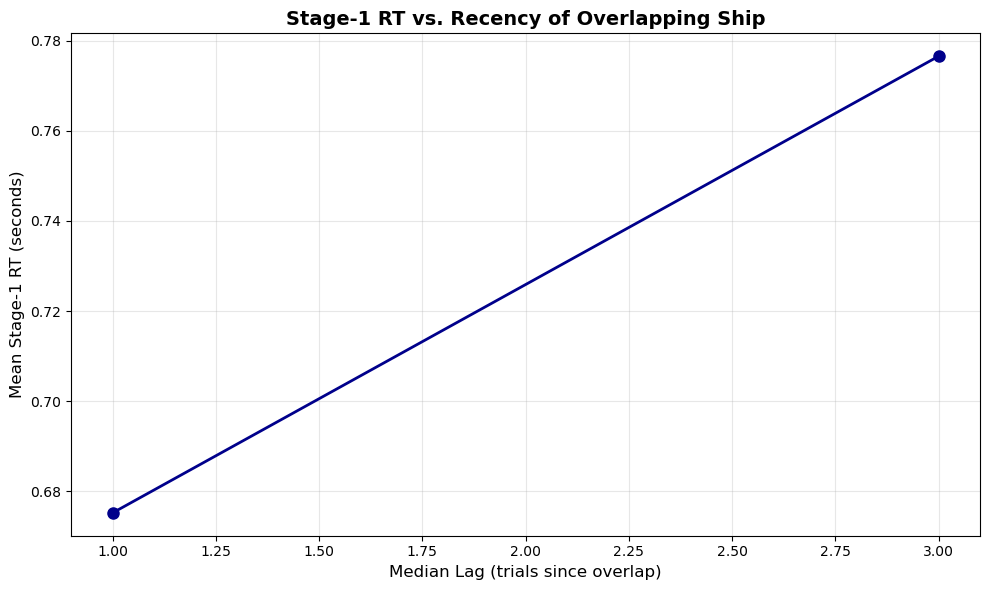

💾 Saved recency table and regression summary

📊 ANALYSIS 3: Stage-2 RT vs Surprisal and RPE
Stage-2 RT Regression Results:
                            OLS Regression Results                            
Dep. Variable:                log_rt2   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     551.2
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           3.21e-72
Time:                        19:17:16   Log-Likelihood:                -42096.
No. Observations:              122802   AIC:                         8.420e+04
Df Residuals:                  122797   BIC:                         8.425e+04
Df Model:                           4                                         
Covariance Type:              cluster                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------

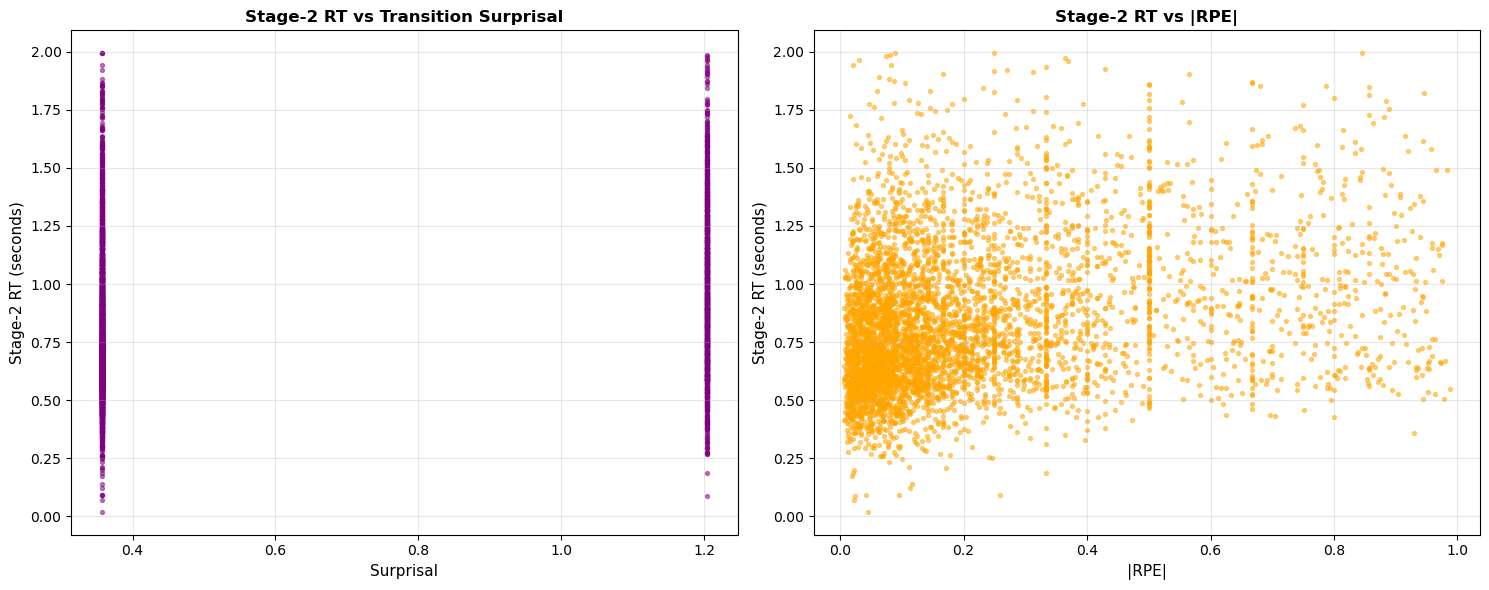

💾 Saved Stage-2 RT regression summary


In [20]:
# ===== ANALYSIS 1: Stage-1 RT by Johnson Distance =====
print("\n" + "="*60)
print("📊 ANALYSIS 1: Stage-1 RT by Johnson Distance")
print("="*60)

# Run regression
rt_res = ols_clustered('log_rt1 ~ C(johnson_d_cat) + set_size + trial_index + EV_gap', 
                       full, cluster_col='subject')

print("Regression Results:")
print(rt_res.summary())

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
data = [full.loc[full['johnson_d']==k, 'rt_stage1'].dropna().values for k in [0.0,1.0,2.0]]
box_plot = ax.boxplot(data, labels=['d=0','d=1','d=2'], patch_artist=True)

# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Stage-1 RT by Johnson Distance (All Conditions)', fontsize=14, fontweight='bold')
ax.set_xlabel('Johnson Distance (d)', fontsize=12)
ax.set_ylabel('Stage-1 RT (seconds)', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save regression results
with open(os.path.join(output_dir, 'rt1_vs_johnson_distance_summary.txt'), 'w') as f:
    f.write(rt_res.summary().as_text())

print(f"💾 Saved regression summary to rt1_vs_johnson_distance_summary.txt")


# ===== ANALYSIS 2: Stage-1 RT with Recency Effects =====
print("\n" + "="*60)
print("📊 ANALYSIS 2: Stage-1 RT with Recency Effects")
print("="*60)

# Run regression with recency terms
rt_res2 = ols_clustered('log_rt1 ~ C(johnson_d_cat) + set_size + trial_index + EV_gap + log1p_lag_min + log1p_pair_lag',
                        full, cluster_col='subject')

print("Regression Results with Recency:")
print(rt_res2.summary())

# Create recency figure
sub = full[['rt_stage1','lag_min_ship']].dropna().copy()
try:
    sub['lag_bin'] = pd.qcut(sub['lag_min_ship'], q=10, duplicates='drop')
except Exception:
    sub['lag_bin'] = pd.cut(sub['lag_min_ship'], bins=10)

grouped = sub.groupby('lag_bin').agg(
    mean_rt=('rt_stage1','mean'),
    median_lag=('lag_min_ship','median'),
    n=('rt_stage1','size')
).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(grouped['median_lag'].values, grouped['mean_rt'].values, 
        marker='o', linewidth=2, markersize=8, color='darkblue')
ax.set_title('Stage-1 RT vs. Recency of Overlapping Ship', fontsize=14, fontweight='bold')
ax.set_xlabel('Median Lag (trials since overlap)', fontsize=12)
ax.set_ylabel('Mean Stage-1 RT (seconds)', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save results
grouped.to_csv(os.path.join(output_dir, 'rt_vs_recency_table.csv'), index=False)
with open(os.path.join(output_dir, 'rt1_with_recency_summary.txt'), 'w') as f:
    f.write(rt_res2.summary().as_text())

print(f"💾 Saved recency table and regression summary")


# ===== ANALYSIS 3: Stage-2 RT vs Surprisal and RPE =====
print("\n" + "="*60)
print("📊 ANALYSIS 3: Stage-2 RT vs Surprisal and RPE")
print("="*60)

rt2_df = full.dropna(subset=['rt_stage2','surprisal','RPE_mag']).copy()
rt2_df['log_rt2'] = np.log(rt2_df['rt_stage2'])

rt2_res = ols_clustered('log_rt2 ~ surprisal + RPE_mag + set_size + trial_index', 
                        rt2_df, cluster_col='subject')

print("Stage-2 RT Regression Results:")
print(rt2_res.summary())

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Sample data for plotting (to avoid overplotting)
samp = rt2_df.sample(min(5000, len(rt2_df)), random_state=42)

# Surprisal plot
ax1.scatter(samp['surprisal'].values, samp['rt_stage2'].values, 
           s=8, alpha=0.5, color='purple')
ax1.set_title('Stage-2 RT vs Transition Surprisal', fontsize=12, fontweight='bold')
ax1.set_xlabel('Surprisal', fontsize=11)
ax1.set_ylabel('Stage-2 RT (seconds)', fontsize=11)
ax1.grid(True, alpha=0.3)

# RPE plot
ax2.scatter(samp['RPE_mag'].values, samp['rt_stage2'].values, 
           s=8, alpha=0.5, color='orange')
ax2.set_title('Stage-2 RT vs |RPE|', fontsize=12, fontweight='bold')
ax2.set_xlabel('|RPE|', fontsize=11)
ax2.set_ylabel('Stage-2 RT (seconds)', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save results
with open(os.path.join(output_dir, 'rt2_surprisal_rpe_summary.txt'), 'w') as f:
    f.write(rt2_res.summary().as_text())

print(f"💾 Saved Stage-2 RT regression summary")


📊 ANALYSIS 4: Directed Exploration
Directed Exploration Logit Results:
                           Logit Regression Results                           
Dep. Variable:            choice_left   No. Observations:               122802
Model:                          Logit   Df Residuals:                   122797
Method:                           MLE   Df Model:                            4
Date:                Sun, 28 Sep 2025   Pseudo R-squ.:                 0.01244
Time:                        19:17:17   Log-Likelihood:                -84060.
converged:                       True   LL-Null:                       -85119.
Covariance Type:              cluster   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0781      0.091     -0.856      0.392      -0.257       0.101
dEV            -2.8880      0.478     -6.038      0.000 

/var/folders/s0/k9fg8kp94xl307gydfsd9gf00000gq/T/ipykernel_11924/3648073881.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g2 = sub2.groupby('U_bin').agg(


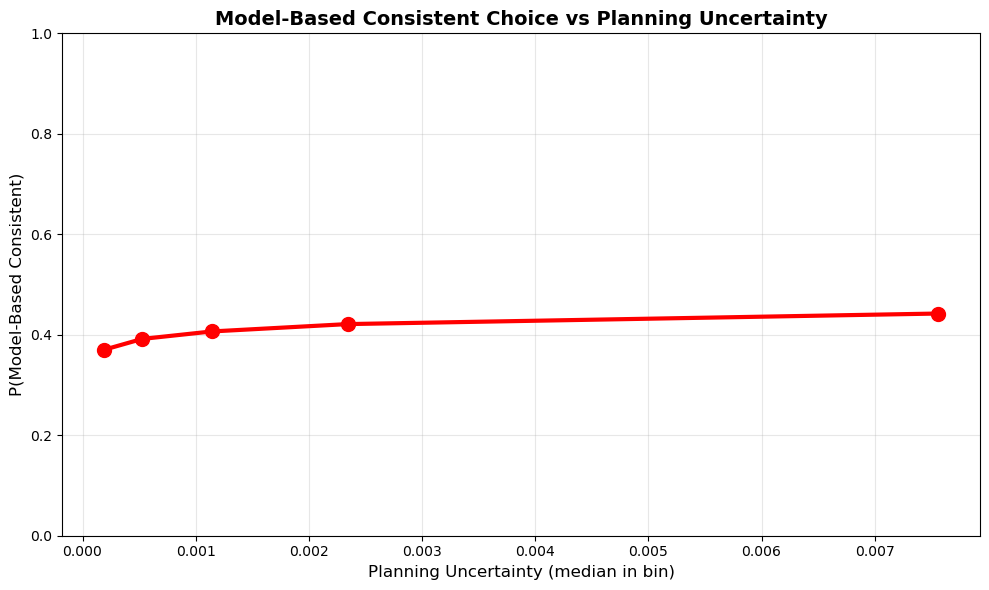


📊 ANALYSIS 6: Policy Complexity Analysis
Policy complexity computed for 415 subject-condition pairs


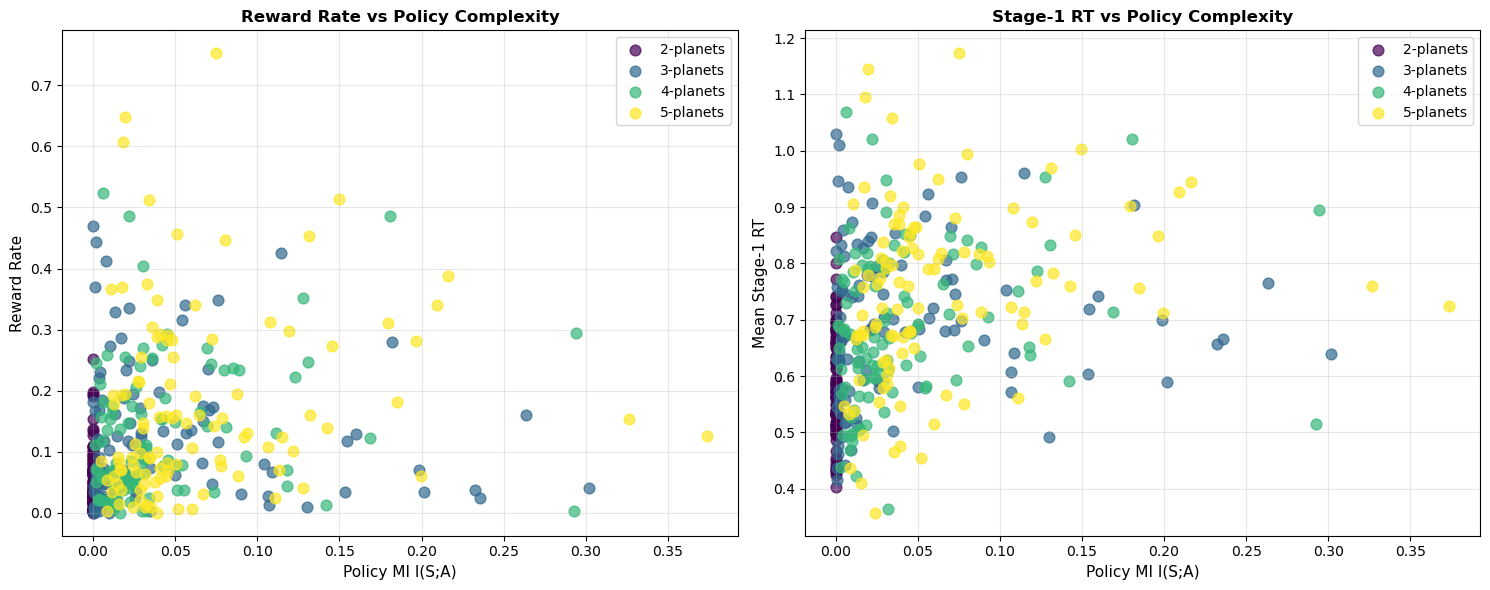


🎉 Analysis Complete!
📁 Output files saved:
  • augmented_trials_all_conditions.csv
  • rt1_vs_johnson_distance_summary.txt
  • rt1_with_recency_summary.txt
  • rt_vs_recency_table.csv
  • rt2_surprisal_rpe_summary.txt
  • logit_directed_exploration_summary.txt
  • logit_mb_consistency_vs_U_summary.txt
  • mb_vs_uncertainty_table.csv
  • policy_complexity_summary.csv


In [21]:
# ===== ANALYSIS 4: Directed Exploration =====
print("\n" + "="*60)
print("📊 ANALYSIS 4: Directed Exploration")
print("="*60)

# Prepare choice data
full['choice_left'] = (full['chosen_ship'] == full['pair_left']).astype(int)
full['dEV'] = full['EV_left'] - full['EV_right']
full['dU'] = full['U_left'] - full['U_right']

logit_res = logit_clustered_fit('choice_left ~ dEV + dU + set_size + trial_index', 
                                full, 'subject')

print("Directed Exploration Logit Results:")
print(logit_res.summary())

# Save results
with open(os.path.join(output_dir, 'logit_directed_exploration_summary.txt'), 'w') as f:
    f.write(logit_res.summary().as_text())


# ===== ANALYSIS 5: Model-Based Consistency =====
print("\n" + "="*60)
print("📊 ANALYSIS 5: Model-Based Consistency vs Uncertainty")
print("="*60)

mb_df = full.dropna(subset=['MB_consistent','U_chosen']).copy()
print(f"MB consistency data: {len(mb_df)} trials")

mb_logit = logit_clustered_fit('MB_consistent ~ U_chosen + set_size + trial_index', 
                               mb_df, 'subject')

print("MB Consistency Logit Results:")
print(mb_logit.summary())

# Create binned analysis
sub2 = mb_df[['MB_consistent','U_chosen']].dropna().copy()
try:
    sub2['U_bin'] = pd.qcut(sub2['U_chosen'], q=5, duplicates='drop')
except Exception:
    sub2['U_bin'] = pd.cut(sub2['U_chosen'], bins=5)

g2 = sub2.groupby('U_bin').agg(
    p_mb=('MB_consistent','mean'),
    U_mid=('U_chosen','median'),
    n=('MB_consistent','size')
).reset_index()

# Plot MB consistency vs uncertainty
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(g2['U_mid'].values, g2['p_mb'].values, 
        marker='o', linewidth=3, markersize=10, color='red')
ax.set_title('Model-Based Consistent Choice vs Planning Uncertainty', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Planning Uncertainty (median in bin)', fontsize=12)
ax.set_ylabel('P(Model-Based Consistent)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Save results
g2.to_csv(os.path.join(output_dir, 'mb_vs_uncertainty_table.csv'), index=False)
with open(os.path.join(output_dir, 'logit_mb_consistency_vs_U_summary.txt'), 'w') as f:
    f.write(mb_logit.summary().as_text())


# ===== ANALYSIS 6: Policy Complexity =====
print("\n" + "="*60)
print("📊 ANALYSIS 6: Policy Complexity Analysis")
print("="*60)

mi_rows = []
for (subj, cond), g in full.groupby(['subject','condition']):
    # I(S;A) with State=state1_index, Action=choice_left
    sub = g[['state1_index','choice_left']].dropna().copy()
    if len(sub) == 0:
        mi = np.nan
    else:
        joint = pd.crosstab(sub['state1_index'], sub['choice_left'])
        P_sa = joint / joint.values.sum()
        P_s = P_sa.sum(axis=1)
        P_a = P_sa.sum(axis=0)
        mi = 0.0
        for s in P_sa.index:
            for a in P_sa.columns:
                p_sa = P_sa.loc[s,a]
                if p_sa <= 0:
                    continue
                mi += p_sa * math.log(p_sa / (P_s.loc[s]*P_a.loc[a] + 1e-12) + 1e-12)
    
    rew_rate = g['reward'].mean()
    mean_rt1 = g['rt_stage1'].mean()
    mi_rows.append({
        'subject': subj, 'condition': cond, 'n_planets': g['n_planets'].iloc[0],
        'policy_MI': mi, 'reward_rate': rew_rate, 'mean_rt1': mean_rt1
    })

mi_df = pd.DataFrame(mi_rows)
print(f"Policy complexity computed for {len(mi_df)} subject-condition pairs")

# Create policy complexity plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# MI vs Reward Rate
colors = plt.cm.viridis(np.linspace(0, 1, len(mi_df['condition'].unique())))
for i, condition in enumerate(sorted(mi_df['condition'].unique())):
    cond_data = mi_df[mi_df['condition'] == condition]
    ax1.scatter(cond_data['policy_MI'], cond_data['reward_rate'], 
               s=60, alpha=0.7, color=colors[i], label=condition)

ax1.set_title('Reward Rate vs Policy Complexity', fontsize=12, fontweight='bold')
ax1.set_xlabel('Policy MI I(S;A)', fontsize=11)
ax1.set_ylabel('Reward Rate', fontsize=11)
ax1.legend()
ax1.grid(True, alpha=0.3)

# MI vs RT
for i, condition in enumerate(sorted(mi_df['condition'].unique())):
    cond_data = mi_df[mi_df['condition'] == condition]
    ax2.scatter(cond_data['policy_MI'], cond_data['mean_rt1'], 
               s=60, alpha=0.7, color=colors[i], label=condition)

ax2.set_title('Stage-1 RT vs Policy Complexity', fontsize=12, fontweight='bold')
ax2.set_xlabel('Policy MI I(S;A)', fontsize=11)
ax2.set_ylabel('Mean Stage-1 RT', fontsize=11)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save results
mi_df.to_csv(os.path.join(output_dir, 'policy_complexity_summary.csv'), index=False)

print("\n🎉 Analysis Complete!")
print("="*60)
print("📁 Output files saved:")
print("  • augmented_trials_all_conditions.csv")
print("  • rt1_vs_johnson_distance_summary.txt")
print("  • rt1_with_recency_summary.txt") 
print("  • rt_vs_recency_table.csv")
print("  • rt2_surprisal_rpe_summary.txt")
print("  • logit_directed_exploration_summary.txt")
print("  • logit_mb_consistency_vs_U_summary.txt")
print("  • mb_vs_uncertainty_table.csv")
print("  • policy_complexity_summary.csv")

## Script source
The cell below shows the full Python script for reference.

In [22]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Menu-graph & planning-uncertainty analyses for two-step variant with variable first-stage menus.

Inputs (default file paths; override with --inputs):
  - hddm2_fixed_final_3states.csv
  - hddm2_fixed_final_4states.csv
  - hddm2_fixed_final_5states.csv
(Optionally hddm2_fixed_final_2states.csv if present.)

Each CSV is expected to contain (names auto-detected):
  subj_idx, rt1, rt2, response1, response2, state1, state2, feedback, trial, q_init, ...

Key derived variables:
  - pair_left, pair_right (menu pair reconstructed from state1 as lexicographic pairs of [0..n-1])
  - chosen_ship (from response1)
  - is_common, surprisal (-log p), reward, RPE_mag
  - Johnson distance d_t between consecutive menus: 0 (same pair), 1 (share one ship), 2 (disjoint)
  - Recency lags: lag_min_ship (most recent overlap), pair_lag (exact pair)
  - Planet-value posteriors (Beta) updated online; EV_i, U_i per option; EV_gap; U_chosen, U_alt
  - MB_consistent (generalized stay/switch when previous chosen ship reappears)

Analyses:
  A1) Stage-1 RT ~ C(Johnson d) + set size + trial + EV_gap [cluster-robust SE by subject]
  A2) Stage-1 RT ~ C(Johnson d) + set size + trial + EV_gap + log recency terms
  A3) Stage-2 RT ~ surprisal + |RPE| + set size + trial
  A4) Directed exploration: choice_left ~ dEV + dU + set size + trial
  A5) MB-consistency ~ U_chosen + set size + trial
  A6) Policy complexity I(S;A) per subject/condition and its relation to reward & RT
  A7) Experience-weighted menu centrality and RT correlation

Outputs (written to --outdir, default: /mnt/data):
  - augmented_trials_all_conditions.csv
  - Regression summaries (.txt): rt1_vs_johnson_distance_summary.txt, rt1_with_recency_summary.txt,
    rt2_surprisal_rpe_summary.txt, logit_directed_exploration_summary.txt, logit_mb_consistency_vs_U_summary.txt
  - Figures (.png): rt_by_distance_all.png, rt_vs_recency.png, rt2_vs_surprisal.png, rt2_vs_RPE.png,
    mi_vs_reward.png, mi_vs_rt.png, centrality_rt_corr.png
  - Tables (.csv): rt_vs_recency_table.csv, mb_vs_uncertainty_table.csv,
    policy_complexity_summary.csv, menu_centrality_summary.csv

Usage:
  python menu_graph_analysis.py \
     --inputs /path/to/hddm2_fixed_final_3states.csv /path/to/hddm2_fixed_final_4states.csv /path/to/hddm2_fixed_final_5states.csv \
     --outdir /path/to/output

"""

import os
import math
import argparse
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

def detect_columns(df):
    cols = {c.lower(): c for c in df.columns}
    def find(name_opts, default=None):
        for k,v in cols.items():
            for opt in name_opts:
                if opt in k:
                    return v
        return default
    subject_col = find(['subj_idx','subject','subj','id','participant'], list(df.columns)[0])
    trial_col   = find(['trial','t_index','trial_index'])
    rt1_col     = find(['rt1','rt_stage1','rt_first','rt_1'])
    rt2_col     = find(['rt2','rt_stage2','rt_second','rt_2'])
    resp1_col   = find(['response1','resp1','choice1','a1'])
    resp2_col   = find(['response2','resp2','choice2','a2'])
    state1_col  = find(['state1','s1','menu','combination','pair'])
    state2_col  = find(['state2','s2','planet'])
    feedback_col= find(['feedback','reward','outcome','r'])
    qinit_col   = find(['q_init','qinit','q0'])
    return {
        'subject': subject_col,
        'trial': trial_col,
        'rt1': rt1_col,
        'rt2': rt2_col,
        'resp1': resp1_col,
        'resp2': resp2_col,
        'state1': state1_col,
        'state2': state2_col,
        'feedback': feedback_col,
        'q_init': qinit_col
    }

def lex_pairs(n):
    return [ (i,j) for i in range(n) for j in range(i+1, n) ]

def pair_from_state1(state1_index, n):
    pairs = lex_pairs(n)
    idx = int(state1_index)
    return pairs[idx] if (0 <= idx < len(pairs)) else None

def build_features_for_condition(df, n_planets, condition_label):
    cols = detect_columns(df)
    ssub = cols['subject']; srt1 = cols['rt1']; srt2 = cols['rt2']
    sresp1 = cols['resp1']; sstate1 = cols['state1']; sstate2 = cols['state2']; sfb = cols['feedback']
    strial = cols['trial']

    for needed in [ssub, srt1, srt2, sresp1, sstate1, sstate2, sfb]:
        if needed is None or needed not in df.columns:
            raise ValueError(f"Missing required column in condition {condition_label}: {needed}")

    df = df.copy()
    if strial is not None:
        df = df.sort_values([ssub, strial]).reset_index(drop=True)
    else:
        df['_trial'] = df.groupby(ssub).cumcount()+1
        strial = '_trial'

    feats = []
    for subj, g in df.groupby(df[ssub]):
        g = g.reset_index(drop=True).copy()

        alpha = np.ones(n_planets) * 1.0
        beta  = np.ones(n_planets) * 1.0

        last_seen_ship = {i: None for i in range(n_planets)}
        last_seen_pair = {}

        prev_choice_ship = None
        prev_pair = None
        prev_reward = None
        prev_rare = None

        for t in range(len(g)):
            row = g.iloc[t]
            state1 = int(row[sstate1])
            pair = pair_from_state1(state1, n_planets)
            if pair is None:
                continue
            i, j = pair
            resp1 = int(row[sresp1])
            chosen_ship = i if resp1==0 else j
            alt_ship = j if resp1==0 else i
            planet = int(row[sstate2])
            rew = int(row[sfb])

            rt1 = float(row[srt1]) if not pd.isna(row[srt1]) else np.nan
            rt2 = float(row[srt2]) if not pd.isna(row[srt2]) else np.nan

            is_common = 1 if planet == chosen_ship else 0
            p_trans = 0.7 if is_common==1 else 0.3
            surprisal = -math.log(max(p_trans, 1e-12))

            V_mean = alpha/(alpha+beta)
            V_var = (alpha*beta)/(((alpha+beta)**2) * (alpha+beta+1))

            EV_i = 0.7*V_mean[i] + 0.3*V_mean[j]
            EV_j = 0.7*V_mean[j] + 0.3*V_mean[i]
            U_i  = (0.7**2)*V_var[i] + (0.3**2)*V_var[j]
            U_j  = (0.7**2)*V_var[j] + (0.3**2)*V_var[i]

            EV_chosen = EV_i if chosen_ship==i else EV_j
            EV_alt    = EV_j if chosen_ship==i else EV_i
            U_chosen  = U_i  if chosen_ship==i else U_j
            U_alt     = U_j  if chosen_ship==i else U_i

            EV_gap = abs(EV_i - EV_j)
            RPE_mag = abs(rew - float(V_mean[planet]))

            if prev_pair is None:
                d_t = np.nan
            else:
                overlap = len(set(pair).intersection(prev_pair))
                d_t = 2 - overlap

            lag_min = None
            for ship in pair:
                last = last_seen_ship.get(ship, None)
                if last is not None:
                    dlag = t - last
                    lag_min = dlag if lag_min is None else min(lag_min, dlag)
            if lag_min is None:
                lag_min = np.nan
            pair_key = tuple(sorted(pair))
            last_pair = last_seen_pair.get(pair_key, None)
            pair_lag = (t - last_pair) if last_pair is not None else np.nan

            mb_consistent = np.nan
            if prev_choice_ship is not None and (prev_choice_ship in pair):
                stayed = 1 if chosen_ship == prev_choice_ship else 0
                if prev_rare==0 and prev_reward==1:
                    want_stay = 1
                elif prev_rare==0 and prev_reward==0:
                    want_stay = 0
                elif prev_rare==1 and prev_reward==1:
                    want_stay = 0
                else:
                    want_stay = 1
                mb_consistent = 1 if stayed==want_stay else 0

            feats.append({
                'subject': subj,
                'condition': condition_label,
                'n_planets': n_planets,
                'trial_index': int(row[strial]) if strial in row else (t+1),
                'state1_index': state1,
                'pair_left': i,
                'pair_right': j,
                'chosen_ship': chosen_ship,
                'alt_ship': alt_ship,
                'rt_stage1': rt1,
                'rt_stage2': rt2,
                'planet': planet,
                'reward': rew,
                'is_common': is_common,
                'surprisal': surprisal,
                'EV_left': float(EV_i),
                'EV_right': float(EV_j),
                'U_left': float(U_i),
                'U_right': float(U_j),
                'EV_chosen': float(EV_chosen),
                'EV_alt': float(EV_alt),
                'U_chosen': float(U_chosen),
                'U_alt': float(U_alt),
                'EV_gap': float(EV_gap),
                'V_mean_planet': float(V_mean[planet]),
                'V_var_planet': float(V_var[planet]),
                'RPE_mag': float(RPE_mag),
                'johnson_d': float(d_t) if not (isinstance(d_t, float) and math.isnan(d_t)) else np.nan,
                'lag_min_ship': lag_min,
                'pair_lag': pair_lag,
                'prev_choice_ship': prev_choice_ship if prev_choice_ship is not None else -1,
                'MB_consistent': mb_consistent
            })

            last_seen_ship[i] = t
            last_seen_ship[j] = t
            last_seen_pair[pair_key] = t
            prev_pair = pair
            prev_choice_ship = chosen_ship
            prev_reward = rew
            prev_rare = 0 if is_common==1 else 1

            alpha[planet] += rew
            beta[planet]  += (1 - rew)
    return pd.DataFrame(feats)

def ols_clustered(formula, data, cluster_col=None):
    model = smf.ols(formula=formula, data=data, missing='drop').fit()
    if cluster_col is not None and cluster_col in data.columns:
        idx = model.model.data.row_labels
        groups = data.loc[idx, cluster_col]
        return model.get_robustcov_results(cov_type='cluster', groups=groups)
    return model

def logit_clustered_fit(formula, data, cluster_col):
    model = smf.logit(formula=formula, data=data, missing='drop')
    idx = model.data.row_labels
    groups = data.loc[idx, cluster_col]
    res = model.fit(disp=0, cov_type='cluster', cov_kwds={'groups': groups})
    return res

def mutual_information_states_actions(df):
    sub = df[['state1_index','choice_left']].dropna().copy()
    if len(sub)==0:
        return np.nan
    joint = pd.crosstab(sub['state1_index'], sub['choice_left'])
    P_sa = joint / joint.values.sum()
    P_s = P_sa.sum(axis=1)
    P_a = P_sa.sum(axis=0)
    mi = 0.0
    for s in P_sa.index:
        for a in P_sa.columns:
            p_sa = P_sa.loc[s,a]
            if p_sa <= 0:
                continue
            mi += p_sa * math.log(p_sa / (P_s.loc[s]*P_a.loc[a] + 1e-12) + 1e-12)
    return mi

def build_weighted_centrality(df):
    nodes = sorted(df['state1_index'].dropna().unique().tolist())
    node_to_idx = {n:i for i,n in enumerate(nodes)}
    if len(nodes) == 0:
        return pd.DataFrame(columns=['state1_index','centrality'])
    W = np.zeros((len(nodes), len(nodes)))
    last = None
    for _, row in df.sort_values('trial_index').iterrows():
        cur = row['state1_index']
        if (last is not None) and (cur in node_to_idx) and (last in node_to_idx):
            i = node_to_idx[last]; j = node_to_idx[cur]
            W[i,j] += 1.0
        last = cur
    row_sums = W.sum(axis=1, keepdims=True)
    with np.errstate(invalid='ignore', divide='ignore'):
        P = np.divide(W, row_sums, out=np.zeros_like(W), where=row_sums>0)
    pi = np.ones(len(nodes)) / max(len(nodes),1)
    for _ in range(100):
        pi = pi @ P
        if pi.sum() <= 0:
            break
        pi = pi / pi.sum()
    cen_df = pd.DataFrame({'state1_index': nodes, 'centrality': pi})
    return cen_df

def run_analyses(inputs, outdir):
    os.makedirs(outdir, exist_ok=True)
    # Load & build features
    all_feats = []
    for p in inputs:
        if not os.path.exists(p):
            print(f"[WARN] Input not found and skipped: {p}")
            continue
        df_raw = pd.read_csv(p)
        base = os.path.basename(p)
        if '3states' in base:
            n = 3
        elif '4states' in base:
            n = 4
        elif '5states' in base:
            n = 5
        elif '2states' in base:
            n = 2
        else:
            # fallback from data
            cols = detect_columns(df_raw)
            n = int(df_raw[cols['state2']].max()) + 1 if cols['state2'] else 5
        feats = build_features_for_condition(df_raw, n_planets=n, condition_label=f'{n}-planets')
        all_feats.append(feats)
    if len(all_feats)==0:
        raise RuntimeError("No valid inputs were loaded.")
    full = pd.concat(all_feats, ignore_index=True)
    # Derived columns
    full['set_size'] = full['n_planets']
    full['johnson_d_cat'] = pd.Categorical(full['johnson_d'], categories=[0.0,1.0,2.0])
    full['log_rt1'] = np.log(full['rt_stage1'].replace({0: np.nan}))
    full['log1p_lag_min'] = np.log1p(full['lag_min_ship'])
    full['log1p_pair_lag'] = np.log1p(full['pair_lag'])
    # Save augmented
    full_path = os.path.join(outdir, 'augmented_trials_all_conditions.csv')
    full.to_csv(full_path, index=False)
    print(f"[OK] Saved augmented trials: {full_path}")

    # A1
    rt_res = ols_clustered('log_rt1 ~ C(johnson_d_cat) + set_size + trial_index + EV_gap', full, cluster_col='subject')
    with open(os.path.join(outdir, 'rt1_vs_johnson_distance_summary.txt'), 'w') as f:
        f.write(rt_res.summary().as_text())

    # A1 figure
    plt.figure(figsize=(7,5))
    data = [full.loc[full['johnson_d']==k, 'rt_stage1'].dropna().values for k in [0.0,1.0,2.0]]
    plt.boxplot(data, labels=['d=0','d=1','d=2'])
    plt.title('Stage-1 RT by Johnson distance (all conditions)')
    plt.xlabel('Johnson distance (d)')
    plt.ylabel('Stage-1 RT (s)')
    plt.tight_layout()
    fig_path = os.path.join(outdir, 'rt_by_distance_all.png')
    plt.savefig(fig_path, dpi=150)
    plt.close()
    print(f"[OK] Saved figure: {fig_path}")

    # A2
    rt_res2 = ols_clustered('log_rt1 ~ C(johnson_d_cat) + set_size + trial_index + EV_gap + log1p_lag_min + log1p_pair_lag',
                            full, cluster_col='subject')
    with open(os.path.join(outdir, 'rt1_with_recency_summary.txt'), 'w') as f:
        f.write(rt_res2.summary().as_text())

    # A2 figure
    sub = full[['rt_stage1','lag_min_ship']].dropna().copy()
    try:
        sub['lag_bin'] = pd.qcut(sub['lag_min_ship'], q=10, duplicates='drop')
    except Exception:
        sub['lag_bin'] = pd.cut(sub['lag_min_ship'], bins=10)
    grouped = sub.groupby('lag_bin').agg(mean_rt=('rt_stage1','mean'),
                                         median_lag=('lag_min_ship','median'),
                                         n=('rt_stage1','size')).reset_index()
    grouped.to_csv(os.path.join(outdir, 'rt_vs_recency_table.csv'), index=False)
    plt.figure(figsize=(7,5))
    plt.plot(grouped['median_lag'].values, grouped['mean_rt'].values, marker='o')
    plt.title('Stage-1 RT vs. recency of overlapping ship')
    plt.xlabel('Median lag (trials since overlap)')
    plt.ylabel('Mean Stage-1 RT (s)')
    plt.tight_layout()
    fig_path = os.path.join(outdir, 'rt_vs_recency.png')
    plt.savefig(fig_path, dpi=150)
    plt.close()
    print(f"[OK] Saved figure: {fig_path}")

    # A3
    rt2_df = full.dropna(subset=['rt_stage2','surprisal','RPE_mag']).copy()
    rt2_df['log_rt2'] = np.log(rt2_df['rt_stage2'])
    rt2_res = ols_clustered('log_rt2 ~ surprisal + RPE_mag + set_size + trial_index', rt2_df, cluster_col='subject')
    with open(os.path.join(outdir, 'rt2_surprisal_rpe_summary.txt'), 'w') as f:
        f.write(rt2_res.summary().as_text())

    # A3 figures
    samp = rt2_df.sample(min(5000, len(rt2_df)), random_state=1)
    plt.figure(figsize=(7,5))
    plt.scatter(samp['surprisal'].values, samp['rt_stage2'].values, s=8, alpha=0.5)
    plt.title('Stage-2 RT vs transition surprisal')
    plt.xlabel('Surprisal')
    plt.ylabel('Stage-2 RT (s)')
    plt.tight_layout()
    fig_path = os.path.join(outdir, 'rt2_vs_surprisal.png')
    plt.savefig(fig_path, dpi=150)
    plt.close()

    plt.figure(figsize=(7,5))
    plt.scatter(samp['RPE_mag'].values, samp['rt_stage2'].values, s=8, alpha=0.5)
    plt.title('Stage-2 RT vs |RPE|')
    plt.xlabel('|RPE|')
    plt.ylabel('Stage-2 RT (s)')
    plt.tight_layout()
    fig_path = os.path.join(outdir, 'rt2_vs_RPE.png')
    plt.savefig(fig_path, dpi=150)
    plt.close()

    # A4
    full['choice_left'] = (full['chosen_ship'] == full['pair_left']).astype(int)
    full['dEV'] = full['EV_left'] - full['EV_right']
    full['dU']  = full['U_left']  - full['U_right']
    logit_res = logit_clustered_fit('choice_left ~ dEV + dU + set_size + trial_index', full, 'subject')
    with open(os.path.join(outdir, 'logit_directed_exploration_summary.txt'), 'w') as f:
        f.write(logit_res.summary().as_text())

    # A5
    mb_df = full.dropna(subset=['MB_consistent','U_chosen']).copy()
    mb_logit = logit_clustered_fit('MB_consistent ~ U_chosen + set_size + trial_index', mb_df, 'subject')
    with open(os.path.join(outdir, 'logit_mb_consistency_vs_U_summary.txt'), 'w') as f:
        f.write(mb_logit.summary().as_text())

    # A5 figure (binned)
    sub2 = mb_df[['MB_consistent','U_chosen']].dropna().copy()
    try:
        sub2['U_bin'] = pd.qcut(sub2['U_chosen'], q=5, duplicates='drop')
    except Exception:
        sub2['U_bin'] = pd.cut(sub2['U_chosen'], bins=5)
    g2 = sub2.groupby('U_bin').agg(p_mb=('MB_consistent','mean'),
                                   U_mid=('U_chosen','median'),
                                   n=('MB_consistent','size')).reset_index()
    g2.to_csv(os.path.join(outdir, 'mb_vs_uncertainty_table.csv'), index=False)
    plt.figure(figsize=(7,5))
    plt.plot(g2['U_mid'].values, g2['p_mb'].values, marker='o')
    plt.title('MB-consistent choice vs planning uncertainty (binned)')
    plt.xlabel('Planning uncertainty (median in bin)')
    plt.ylabel('P(MB-consistent)')
    plt.tight_layout()
    fig_path = os.path.join(outdir, 'mb_vs_uncertainty.png')
    plt.savefig(fig_path, dpi=150)
    plt.close()

    # A6
    mi_rows = []
    for (subj, cond), g in full.groupby(['subject','condition']):
        # I(S;A) with State=state1_index, Action=choice_left
        sub = g[['state1_index','choice_left']].dropna().copy()
        if len(sub)==0:
            mi = np.nan
        else:
            joint = pd.crosstab(sub['state1_index'], sub['choice_left'])
            P_sa = joint / joint.values.sum()
            P_s = P_sa.sum(axis=1)
            P_a = P_sa.sum(axis=0)
            mi = 0.0
            for s in P_sa.index:
                for a in P_sa.columns:
                    p_sa = P_sa.loc[s,a]
                    if p_sa <= 0:
                        continue
                    mi += p_sa * math.log(p_sa / (P_s.loc[s]*P_a.loc[a] + 1e-12) + 1e-12)
        rew_rate = g['reward'].mean()
        mean_rt1 = g['rt_stage1'].mean()
        mi_rows.append({'subject': subj, 'condition': cond, 'n_planets': g['n_planets'].iloc[0],
                        'policy_MI': mi, 'reward_rate': rew_rate, 'mean_rt1': mean_rt1})
    mi_df = pd.DataFrame(mi_rows)
    mi_df.to_csv(os.path.join(outdir, 'policy_complexity_summary.csv'), index=False)

    plt.figure(figsize=(7,5))
    plt.scatter(mi_df['policy_MI'].values, mi_df['reward_rate'].values, s=30)
    plt.title('Reward rate vs policy complexity')
    plt.xlabel('Policy MI I(S;A)')
    plt.ylabel('Reward rate')
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, 'mi_vs_reward.png'), dpi=150)
    plt.close()

    plt.figure(figsize=(7,5))
    plt.scatter(mi_df['policy_MI'].values, mi_df['mean_rt1'].values, s=30)
    plt.title('Stage-1 RT vs policy complexity')
    plt.xlabel('Policy MI I(S;A)')
    plt.ylabel('Mean Stage-1 RT')
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, 'mi_vs_rt.png'), dpi=150)
    plt.close()

    # A7
    centrality_rows = []
    for (subj, cond), g in full.groupby(['subject','condition']):
        cen = build_weighted_centrality(g)
        if len(cen)==0:
            continue
        merged = g.merge(cen, on='state1_index', how='left')
        corr = merged[['centrality','rt_stage1']].dropna().corr().iloc[0,1]
        centrality_rows.append({'subject': subj, 'condition': cond, 'n_planets': g['n_planets'].iloc[0],
                                'centrality_rt_corr': corr, 'mean_centrality': merged['centrality'].mean()})
    centrality_df = pd.DataFrame(centrality_rows)
    centrality_df.to_csv(os.path.join(outdir, 'menu_centrality_summary.csv'), index=False)

    plt.figure(figsize=(7,5))
    plt.scatter(centrality_df['n_planets'].values, centrality_df['centrality_rt_corr'].values, s=30)
    plt.title('RT~centrality correlation by condition')
    plt.xlabel('n planets')
    plt.ylabel('corr(centrality, RT)')
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, 'centrality_rt_corr.png'), dpi=150)
    plt.close()

    print("[DONE] All analyses completed.")

def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--inputs', nargs='+', default=[
        '/mnt/data/hddm2_fixed_final_3states.csv',
        '/mnt/data/hddm2_fixed_final_4states.csv',
        '/mnt/data/hddm2_fixed_final_5states.csv',
        '/mnt/data/hddm2_fixed_final_2states.csv'
    ], help='Paths to condition CSV files (any subset).')
    parser.add_argument('--outdir', default='/mnt/data', help='Output directory.')
    return parser.parse_args()

# Note: The execution block below is commented out to prevent conflicts in Jupyter
# if __name__ == '__main__':
#     args = parse_args()
#     run_analyses(args.inputs, args.outdir)